In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.shape

(1259, 27)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1259.0,7.942815e+07,2.818299e+09,-1726.0,27.0,31.0,36.0,1.000000e+11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

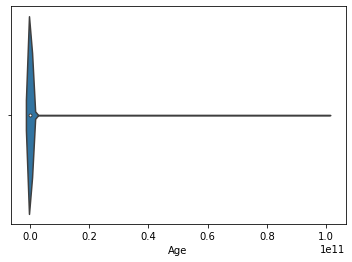

In [8]:
# sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df.Age)

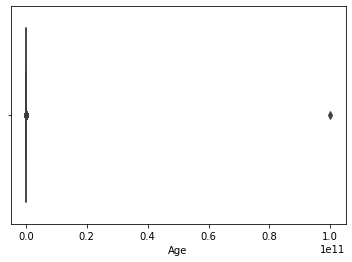

In [9]:
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.Age)

# Replacing outlier in Age with median

In [10]:
df.Age[df.Age<20]

43        18
75        19
93        18
118       18
129       19
143      -29
150       19
282       18
287       18
478       18
482       18
592       19
682       19
715    -1726
734        5
749       19
989        8
991       19
1020      19
1027      19
1090      11
1127      -1
Name: Age, dtype: int64

In [11]:
# Replacing age below 0 with median
df.Age.median()

31.0

In [12]:
df.Age = df.Age.map(lambda x: x if x>0 else df.Age.median())

In [13]:
df.Age[df.Age>100]

364    3.290000e+02
390    1.000000e+11
Name: Age, dtype: float64

In [14]:
df.Age = df.Age.map(lambda x: x if x<100 else df.Age.median())

In [15]:
df.Age[df.Age>100]

Series([], Name: Age, dtype: float64)

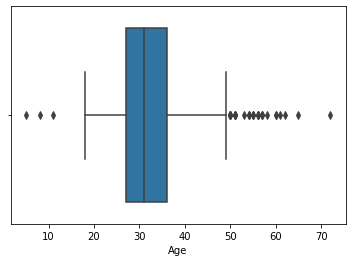

In [16]:
ax = sns.boxplot(x=df.Age)

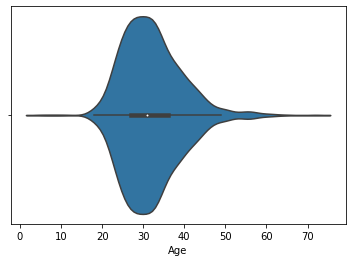

In [17]:
ax = sns.violinplot(x=df.Age)

In [18]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [19]:
df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

## Country

In [20]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

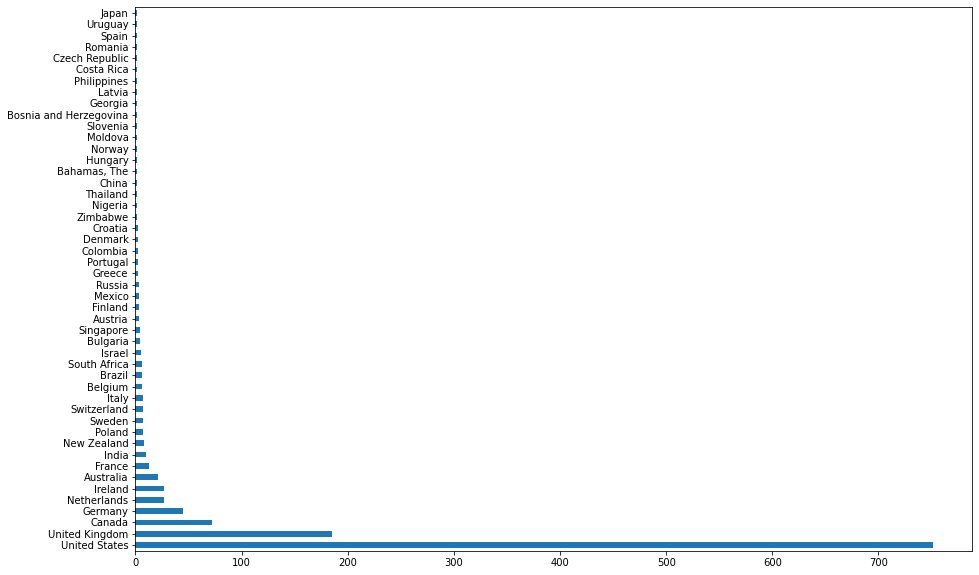

In [21]:
pd.value_counts(df['Country']).plot.barh(figsize=(15,10))

## Self Employed

In [22]:
df.self_employed.isnull().sum()

18

In [23]:
df.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

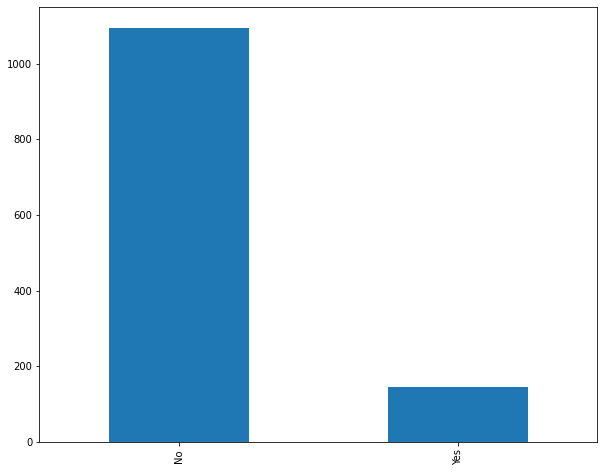

In [24]:
pd.value_counts(df['self_employed']).plot.bar(figsize=(10,8))

## Treatment

In [25]:
df.treatment.isnull().sum()

0

In [26]:
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

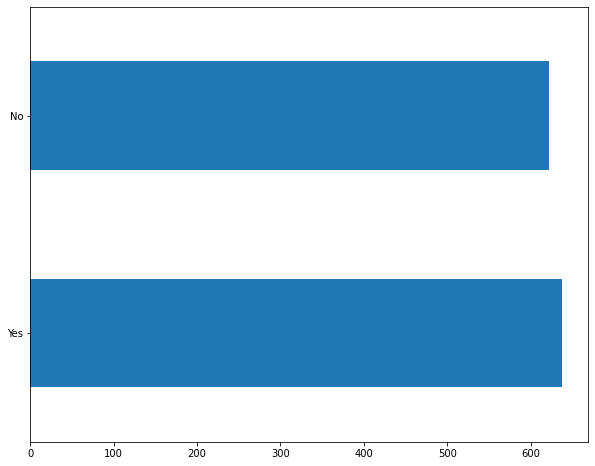

In [27]:
pd.value_counts(df['treatment']).plot.barh(figsize=(10,8))

# Number of employee

In [28]:
df.no_employees.isnull().sum()

0

In [29]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

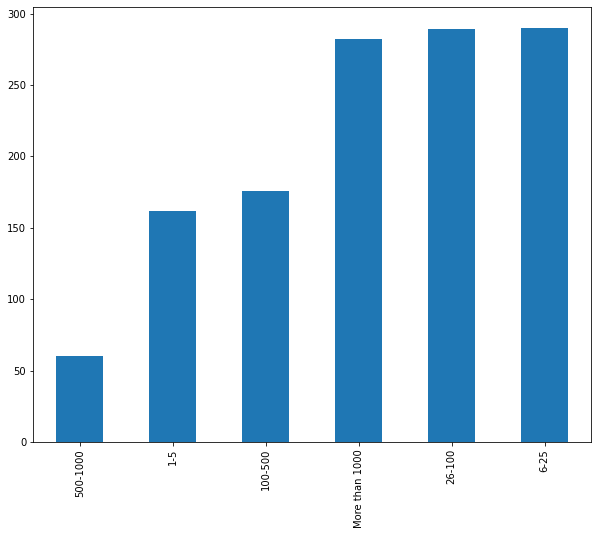

In [30]:
pd.value_counts(df['no_employees']).sort_values(ascending=True).plot.bar(sort_columns=False, figsize=(10,8))

In [31]:
(df['no_employees']).value_counts().sort_index()

1-5               162
100-500           176
26-100            289
500-1000           60
6-25              290
More than 1000    282
Name: no_employees, dtype: int64

## Technology Company

In [32]:
df.tech_company.isnull().sum()

0

In [33]:
df.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

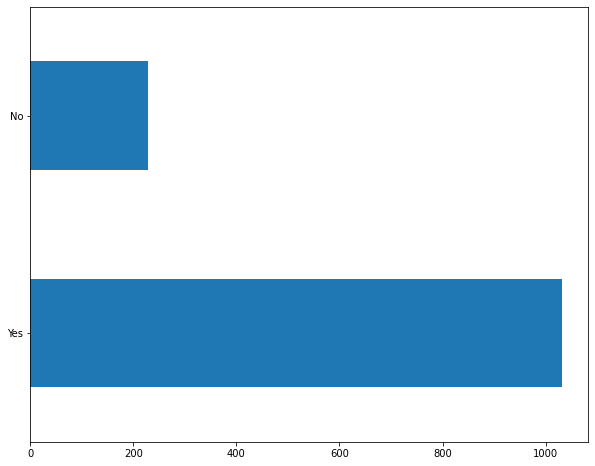

In [34]:
pd.value_counts(df['tech_company']).plot.barh(figsize=(10,8))

In [35]:
def analyze_column(col):
    
    display(
        'Missing value',
        '*************************',
        df[col].isnull().sum(),
        'Value count',
        '*************************',
        df[col].value_counts())

    pd.value_counts(df[col]).plot.barh(figsize=(10,8))
    

'Missing value'

'*************************'

0

'Value count'

'*************************'

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

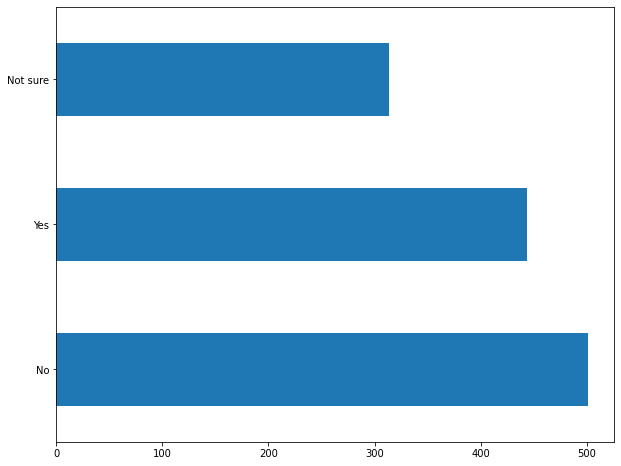

In [36]:
analyze_column('care_options')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

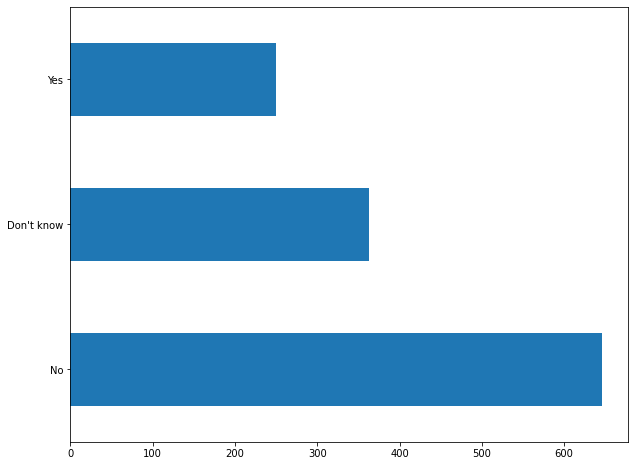

In [37]:
analyze_column('seek_help')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

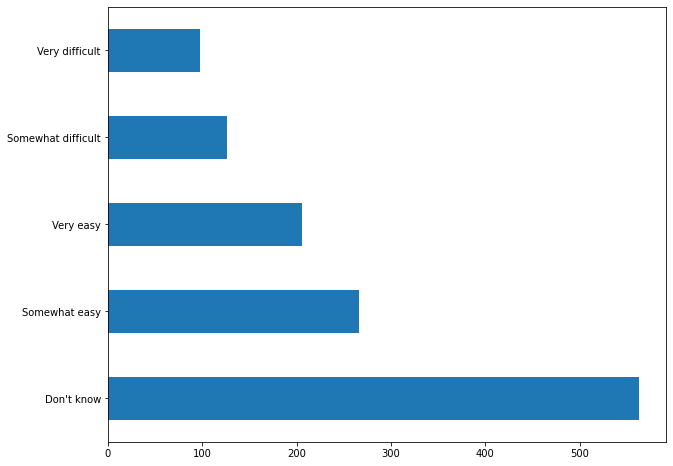

In [38]:
analyze_column('leave')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

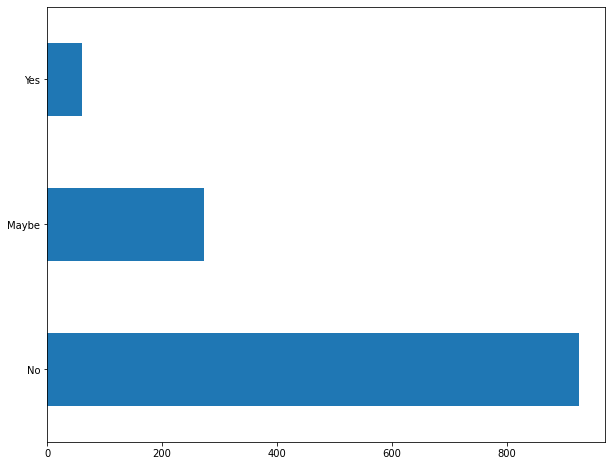

In [39]:
analyze_column('phys_health_consequence')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

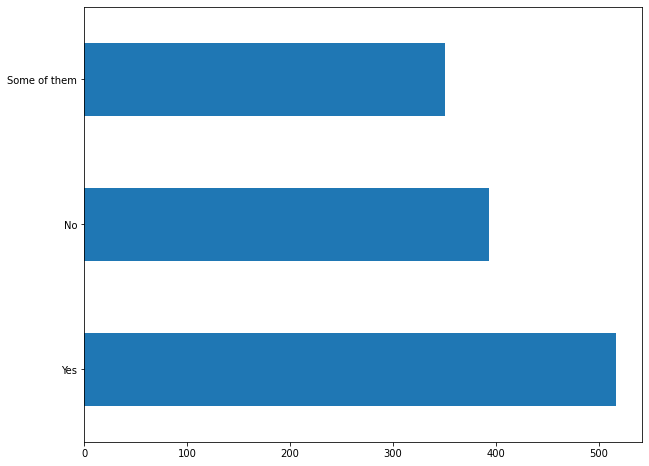

In [40]:
analyze_column('supervisor')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

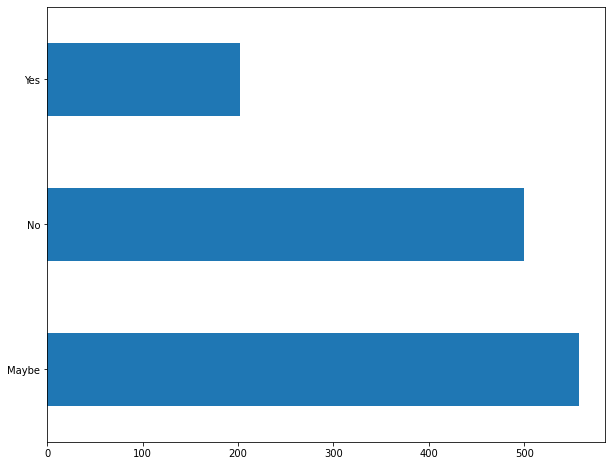

In [41]:
analyze_column('phys_health_interview')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No     1075
Yes     184
Name: obs_consequence, dtype: int64

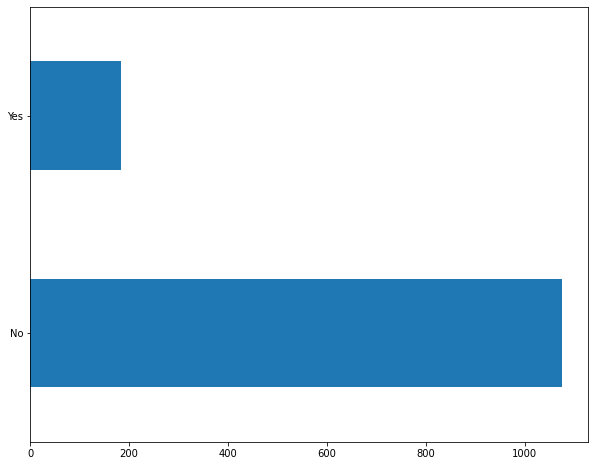

In [42]:
analyze_column('obs_consequence')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

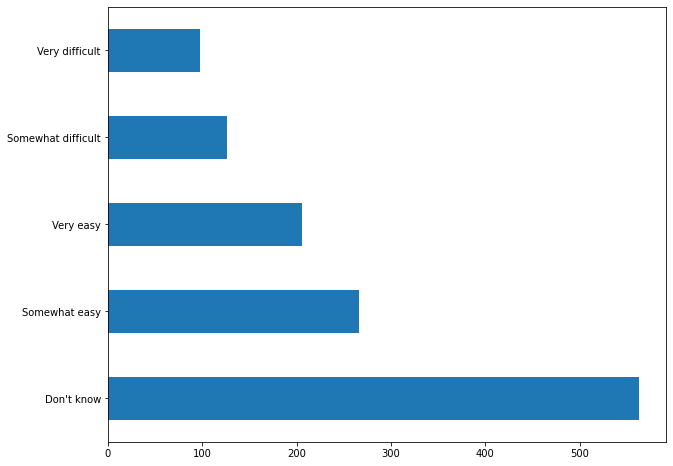

In [43]:
analyze_column('leave')

In [44]:
# If condition on a cell value using lambda function 
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if 'Fe' in x else ('Female' if 'fe' in x  else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if 'Wo' in x else ('Female' if 'wo' in x else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Female' if x=="F" else ('Female' if  x=="f"  else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x.startswith("m") else ('Male' if 'Ma' in x else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x=="M" else ('Male' if x=="something kinda male?" else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x=="cis male" else ('Male' if x=="ostensibly male, unsure what that really means" else x))
df['Gender'] = df['Gender'].apply(lambda x: 'Male' if x=="Guy (-ish) ^_^" else("Others" if "ale" not in x else x))

In [45]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

'Missing value'

'*************************'

0

'Value count'

'*************************'

Male      995
Female    251
Others     13
Name: Gender, dtype: int64

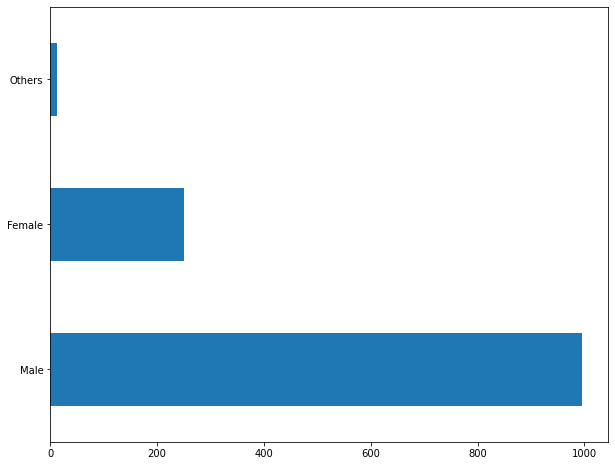

In [46]:
analyze_column('Gender')

In [47]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report, precision_score, f1_score
from catboost import CatBoostClassifier

In [48]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37.0,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44.0,Male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32.0,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31.0,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31.0,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Timestamp                  1259 non-null   object 
 1   Age                        1259 non-null   float64
 2   Gender                     1259 non-null   object 
 3   Country                    1259 non-null   object 
 4   state                      744 non-null    object 
 5   self_employed              1241 non-null   object 
 6   family_history             1259 non-null   object 
 7   treatment                  1259 non-null   object 
 8   work_interfere             995 non-null    object 
 9   no_employees               1259 non-null   object 
 10  remote_work                1259 non-null   object 
 11  tech_company               1259 non-null   object 
 12  benefits                   1259 non-null   object 
 13  care_options               1259 non-null   objec

In [50]:
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

In [51]:
df.treatment = df.treatment.map(lambda x: 1 if x=='Yes' else 0)

In [52]:
df.treatment.value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [53]:
def interpolate_missing_values(col):
    # convert to category
    df_col = df[col].astype('category')

    # manipulated data
    df_col = df_col.cat.codes.replace(-1, np.nan) \
                .interpolate(method='linear', limit_direction='backward') \
                .astype(int).astype('category') \
                .cat.rename_categories(df_col.cat.categories)

    # convert back to object
    # return
    return df_col.astype('object')

In [54]:
df.self_employed = interpolate_missing_values('self_employed')
df.state = interpolate_missing_values('state')
df.work_interfere = interpolate_missing_values('work_interfere')

In [55]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [56]:
df.Age = df.Age.astype('int')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      1259 non-null   object
 5   self_employed              1259 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   int64 
 8   work_interfere             1259 non-null   object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [58]:
df.treatment.value_counts()

1    637
0    622
Name: treatment, dtype: int64

In [59]:
drop_columns = ['Timestamp', 'comments', 'treatment']
# df1 = df.drop(columns=['Timestamp', 'comments'])

X = df.drop(columns=drop_columns)
y = df['treatment']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [61]:
cat_col = []

for col in X.columns:
    if df[col].dtypes == 'object':
        cat_col.append(col)

In [62]:
df[cat_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     1259 non-null   object
 1   Country                    1259 non-null   object
 2   state                      1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   work_interfere             1259 non-null   object
 6   no_employees               1259 non-null   object
 7   remote_work                1259 non-null   object
 8   tech_company               1259 non-null   object
 9   benefits                   1259 non-null   object
 10  care_options               1259 non-null   object
 11  wellness_program           1259 non-null   object
 12  seek_help                  1259 non-null   object
 13  anonymity                  1259 non-null   object
 14  leave   

In [63]:
X_train.head()

,Age,Gender,Country,state,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
1013,38,Female,United States,OR,No,Yes,Sometimes,26-100,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
664,30,Male,Italy,FL,No,No,Sometimes,More than 1000,No,No,...,Yes,Very easy,No,No,Some of them,Some of them,No,No,Don't know,No
740,37,Male,Australia,TN,No,Yes,Sometimes,26-100,No,Yes,...,Yes,Very easy,No,No,Some of them,Yes,No,Maybe,Yes,Yes
826,20,Male,United States,WA,No,No,Never,26-100,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No
174,34,Female,Canada,MS,No,Yes,Sometimes,More than 1000,No,No,...,Don't know,Somewhat easy,No,No,Some of them,Yes,No,No,No,No


In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1133 entries, 1013 to 832
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1133 non-null   int64 
 1   Gender                     1133 non-null   object
 2   Country                    1133 non-null   object
 3   state                      1133 non-null   object
 4   self_employed              1133 non-null   object
 5   family_history             1133 non-null   object
 6   work_interfere             1133 non-null   object
 7   no_employees               1133 non-null   object
 8   remote_work                1133 non-null   object
 9   tech_company               1133 non-null   object
 10  benefits                   1133 non-null   object
 11  care_options               1133 non-null   object
 12  wellness_program           1133 non-null   object
 13  seek_help                  1133 non-null   object
 14  anonym

In [65]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                           0
self_employed                   0
family_history                  0
treatment                       0
work_interfere                  0
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [66]:
catboost = CatBoostClassifier(learning_rate=0.05,
                              eval_metric = "Accuracy",
                              verbose=200,
                              early_stopping_rounds = 200,
                              cat_features=cat_col
                              )

In [67]:
def model_prediction(model,features_train,features_test,labels_train,labels_test):
    clf= model
    clf.fit(features_train,labels_train)
    pred=clf.predict(features_test)
    cnf_matrix=confusion_matrix(labels_test,pred)
    print("the recall for this model is :",cnf_matrix[1,1]/(cnf_matrix[1,1]+cnf_matrix[1,0]))
    fig= plt.figure(figsize=(10,8))# to plot the graph
    print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
    print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
    print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
    print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
    sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
#     plt.figure(figsize=(10,8))
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show()
    print("\n----------Classification Report------------------------------------")
    print(classification_report(labels_test,pred))
    # plotting feature importance
    print("\n----------Feature importance------------------------------------")
    columns_to_scale = features_train.columns.tolist()
    fig, ax = plt.subplots(figsize=(16,8))
    width=0.35
    ax.bar(np.arange(len(columns_to_scale)), clf.feature_importances_, width, color='r')
    ax.set_xticks(np.arange(len(clf.feature_importances_)))
    ax.set_xticklabels(columns_to_scale,rotation=90)
    plt.title('Feature Importance from Catboost')
    ax.set_ylabel('Normalized Gini Importance')
    
    return clf

0:	learn: 0.7290380	total: 71.3ms	remaining: 1m 11s
200:	learn: 0.8914387	total: 1.14s	remaining: 4.52s
400:	learn: 0.9585172	total: 2.39s	remaining: 3.57s
600:	learn: 0.9841130	total: 3.53s	remaining: 2.35s
800:	learn: 0.9938217	total: 4.67s	remaining: 1.16s
999:	learn: 0.9991174	total: 5.85s	remaining: 0us
the recall for this model is : 0.726027397260274
TP 53
TN 39
FP 14
FN 20


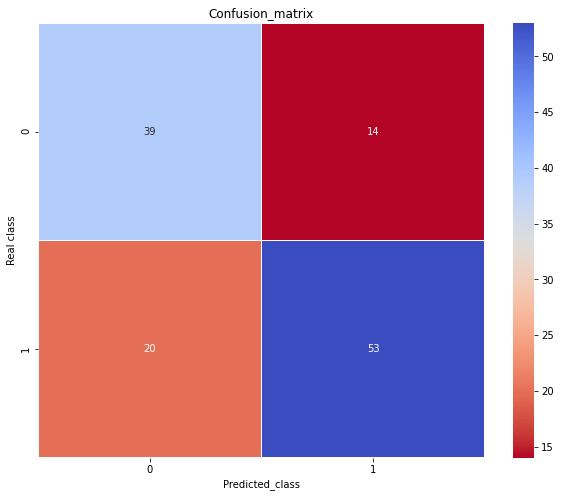


----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.74      0.70        53
           1       0.79      0.73      0.76        73

    accuracy                           0.73       126
   macro avg       0.73      0.73      0.73       126
weighted avg       0.74      0.73      0.73       126


----------Feature importance------------------------------------


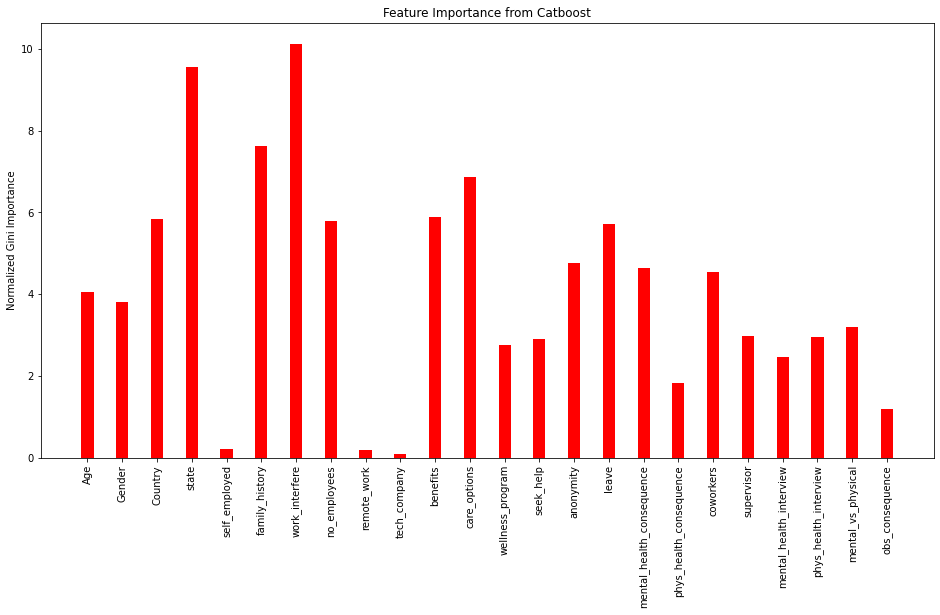

In [68]:
pred = model_prediction(catboost, X_train, X_test, y_train, y_test)